### Important Note: Please add accelerator as GPU P100. Regarding instructions, use add input option to add the two files : 'converted_mapping.csv' and 'converted_audio.zip'. Their file paths in this project are : /kaggle/input/mapping/converted_mapping.csv and /kaggle/input/swahili-audios-converted/converted_audio. Links to these input files are provided in the report. All the codes are to be run one after another in a sequence

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:

mapping = pd.read_csv('/kaggle/input/mapping/converted_mapping.csv')
mapping

,transcript_file,audio_file,text
0,305_Historia ya Shekh Nabhany_75.txt,305_Historia ya Shekh Nabhany_75.wav,kismat kizuri alipomwona ya deshi la kuyakaa M...
1,305_Historia ya Shekh Nabhany_76.txt,305_Historia ya Shekh Nabhany_76.wav,department kwa mwaka mmoja halafu kampuni ikaa...
2,305_Historia ya Shekh Nabhany_77.txt,305_Historia ya Shekh Nabhany_77.wav,kazi kwa Jafar Al’Kampuni mke wake Fatma akaka...
3,305_Historia ya Shekh Nabhany_78.txt,305_Historia ya Shekh Nabhany_78.wav,Nabhany alilasimisha neema kubwa kumuacha alim...
4,305_Historia ya Shekh Nabhany_79.txt,305_Historia ya Shekh Nabhany_79.wav,lakini hawa wote aliowaoa kila mmoja alikuwa a...
...,...,...,...
6317,workshop_95.txt,workshop_95.wav,tuzo mahususi ambayo shule ya mbita ilipewa ni...
6318,workshop_96.txt,workshop_96.wav,matokeo yalivutia na kutia moyo kwa sababu kwa...
6319,workshop_97.txt,workshop_97.wav,kupigwa domo tu maana yake ni neno kumbukumbu ...
6320,workshop_98.txt,workshop_98.wav,zawadi mzomzo ni zawadi taarifa hii inatufunza...


In [3]:
null_rows = mapping[mapping.isnull().any(axis=1)]
null_rows #store null rows. These will be used for inference later.

,transcript_file,audio_file,text
2548,tweet_2125.txt,tweet_2125.wav,NaN
2774,tweet_2329.txt,tweet_2329.wav,NaN
2822,tweet_2373.txt,tweet_2373.wav,NaN
2854,tweet_2401.txt,tweet_2401.wav,NaN
2883,tweet_2429.txt,tweet_2429.wav,NaN
2995,tweet_2525.txt,tweet_2525.wav,NaN
4431,tweet_5620.txt,tweet_5620.wav,NaN
4432,tweet_5621.txt,tweet_5621.wav,NaN
4438,tweet_5627.txt,tweet_5627.wav,NaN
4477,tweet_5662.txt,tweet_5662.wav,NaN


In [4]:
mapping = mapping.dropna() #removing null texts

In [5]:
mapping_with_brackets = mapping[mapping['text'].apply(lambda x: '(' in x or ')' in x)]
mapping_with_brackets #These will be used for inference later

,transcript_file,audio_file,text
1276,tweet_106.txt,tweet_106.wav,nilidhani ni afisa polisi peke mwenye bunduki ...
1439,tweet_1170.txt,tweet_1170.wav,1170)
1559,tweet_125.txt,tweet_125.wav,kwa hiyo iliwachukua miaka kugundua hili au kw...
2088,tweet_1720.txt,tweet_1720.wav,nimejua sasa bora una meno zamani tulikuwa...
2142,tweet_177.txt,tweet_177.wav,ferry yamwaga au ndio amevuka digo wacha kama...
...,...,...,...
5540,tweet_6627.txt,tweet_6627.wav,swali la siku je ni changamoto zipi umekumban...
5546,tweet_6632.txt,tweet_6632.wav,swali je watoto wako wamepokea chanjo dhidi ...
5555,tweet_6640.txt,tweet_6640.wav,swali la siku ungependa kujua nini kuhusu kil...
5624,tweet_6703.txt,tweet_6703.wav,swali je ungependa kujua nini kuhusu maradhi...


In [6]:
mapping_filtered = mapping[mapping['text'].apply(lambda x: '(' not in x and ')' not in x)]
mapping_filtered

,transcript_file,audio_file,text
0,305_Historia ya Shekh Nabhany_75.txt,305_Historia ya Shekh Nabhany_75.wav,kismat kizuri alipomwona ya deshi la kuyakaa M...
1,305_Historia ya Shekh Nabhany_76.txt,305_Historia ya Shekh Nabhany_76.wav,department kwa mwaka mmoja halafu kampuni ikaa...
2,305_Historia ya Shekh Nabhany_77.txt,305_Historia ya Shekh Nabhany_77.wav,kazi kwa Jafar Al’Kampuni mke wake Fatma akaka...
3,305_Historia ya Shekh Nabhany_78.txt,305_Historia ya Shekh Nabhany_78.wav,Nabhany alilasimisha neema kubwa kumuacha alim...
4,305_Historia ya Shekh Nabhany_79.txt,305_Historia ya Shekh Nabhany_79.wav,lakini hawa wote aliowaoa kila mmoja alikuwa a...
...,...,...,...
6317,workshop_95.txt,workshop_95.wav,tuzo mahususi ambayo shule ya mbita ilipewa ni...
6318,workshop_96.txt,workshop_96.wav,matokeo yalivutia na kutia moyo kwa sababu kwa...
6319,workshop_97.txt,workshop_97.wav,kupigwa domo tu maana yake ni neno kumbukumbu ...
6320,workshop_98.txt,workshop_98.wav,zawadi mzomzo ni zawadi taarifa hii inatufunza...


In [7]:
#dealing with some missing files
mapping_filtered = mapping_filtered[mapping_filtered['audio_file']!='427_Mazungumzo na mkutubi_1.wav']
mapping_filtered = mapping_filtered[mapping_filtered['audio_file']!='430_Swa.story.002A_1.wav']

In [8]:
missing_file1 = mapping[mapping['audio_file']=='427_Mazungumzo na mkutubi_1.wav']
missing_file2 = mapping[mapping['audio_file']=='430_Swa.story.002A_1.wav']
missing_files = pd.concat([missing_file1,missing_file2],ignore_index=True)
missing_files

,transcript_file,audio_file,text
0,427_Mazungumzo na mkutubi_1.txt,427_Mazungumzo na mkutubi_1.wav,hii kazi lini hii kazi nilianza 2007 namasomo ...
1,430_Swa.story.002A_1.txt,430_Swa.story.002A_1.wav,ukakita mzizi na kustakimu katika ngozi ya Haj...


In [9]:
pattern = '[^A-Za-z0-9\s]'
#removing special characters
mapping_filtered['text'] = mapping_filtered['text'].str.replace(pattern,' ',regex=True)
mapping_filtered['text'] = mapping_filtered['text'].str.replace(r'\s+', ' ', regex=True)
mapping_filtered['text'] = mapping_filtered['text'].str.strip()

In [10]:
pattern ='covid 19'
mapping_filtered['text'] = mapping_filtered['text'].str.replace(pattern,'covid nineteen',regex=True)

In [11]:
pattern = '[0-9]'
numeric_vals = mapping_filtered[mapping_filtered['text'].str.contains(pattern,regex=True)]
mapping_filtered = mapping_filtered[~mapping_filtered['text'].str.contains(pattern,regex=True)]

In [12]:
#Final mapping to be given as input for spectogram conversion
mapping_filtered.shape

(6063, 3)

In [13]:
inference_values = pd.concat([mapping_with_brackets,numeric_vals,missing_files,null_rows],ignore_index=True)
inference_values.shape

(259, 3)

In [14]:
audio_sources = []
text_sources = []
for i in range(mapping_filtered.shape[0]):
    audio_sources.append('/kaggle/input/swahili-audios-converted/converted_audio/'+mapping_filtered.iloc[i,1])
    text_sources.append(mapping_filtered.iloc[i,2])

### Converting to Dataset format in batches. This is done to avoid CPU overload in Kaggle. Finally the batches will be merged to create the data to be passed to the Whisper-base model

In [15]:
import os
import torch
from datasets import Dataset, Audio
from transformers import WhisperFeatureExtractor, WhisperTokenizer

# Load feature extractor & tokenizer
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-base")
tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-base", language="Swahili", task="transcribe")

# Set batch size (adjust based on memory)
BATCH_SIZE = 1000  # Try reducing to 500 if memory is still an issue
SAVE_DIR = "/kaggle/working/processed_batches"
os.makedirs(SAVE_DIR, exist_ok=True)

# Function to process dataset
def prepare_dataset(batch):
    audio = batch["audio"]

    # Compute log-Mel input features
    batch["input_features"] = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"]).input_features[0]

    # Tokenize text
    batch["labels"] = tokenizer(batch["sentence"]).input_ids

    return batch

num_batches = (len(audio_sources) + BATCH_SIZE - 1) // BATCH_SIZE  # Ceiling division

for i in range(num_batches):
    print(f"Processing batch {i+1}/{num_batches}")

    # Get batch slice
    start = i * BATCH_SIZE
    end = min((i + 1) * BATCH_SIZE, len(audio_sources))

    # Create dataset for this batch
    batch_dataset = Dataset.from_dict({
        "audio": audio_sources[start:end],
        "sentence": text_sources[start:end]
    }).cast_column("audio", Audio(sampling_rate=16000))

    # Process batch
    processed_batch = batch_dataset.map(prepare_dataset, remove_columns=["audio", "sentence"], num_proc=4)

    # Save batch to disk immediately
    batch_path = os.path.join(SAVE_DIR, f"batch_{i}")
    processed_batch.save_to_disk(batch_path)

    print(f"Saved batch {i+1}/{num_batches} to {batch_path}")

    # Free memory
    del batch_dataset, processed_batch
    torch.cuda.empty_cache()


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

Processing batch 1/7


Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saved batch 1/7 to /kaggle/working/processed_batches/batch_0
Processing batch 2/7


Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saved batch 2/7 to /kaggle/working/processed_batches/batch_1
Processing batch 3/7


Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saved batch 3/7 to /kaggle/working/processed_batches/batch_2
Processing batch 4/7


Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saved batch 4/7 to /kaggle/working/processed_batches/batch_3
Processing batch 5/7


Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saved batch 5/7 to /kaggle/working/processed_batches/batch_4
Processing batch 6/7


Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saved batch 6/7 to /kaggle/working/processed_batches/batch_5
Processing batch 7/7


Map (num_proc=4):   0%|          | 0/63 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/63 [00:00<?, ? examples/s]

Saved batch 7/7 to /kaggle/working/processed_batches/batch_6


### Merging batches to create the final dataset

In [16]:
from datasets import load_from_disk, concatenate_datasets
import os

SAVE_DIR = "/kaggle/working/processed_batches"
batch_dirs = sorted([os.path.join(SAVE_DIR, d) for d in os.listdir(SAVE_DIR)])

# Load and concatenate datasets on demand
datasets = [load_from_disk(d) for d in batch_dirs]
final_dataset = concatenate_datasets(datasets)

# Save the final concatenated dataset
final_dataset.save_to_disk("/kaggle/working/final_dataset")
print("Final dataset saved successfully!")


Saving the dataset (0/12 shards):   0%|          | 0/6063 [00:00<?, ? examples/s]

Final dataset saved successfully!


In [17]:
#Deleting the processed batches from working memory since we have the final dataset now
import shutil

# Specify the folder path
folder_path = '/kaggle/working/processed_batches'

# Remove the folder and all its contents
shutil.rmtree(folder_path)

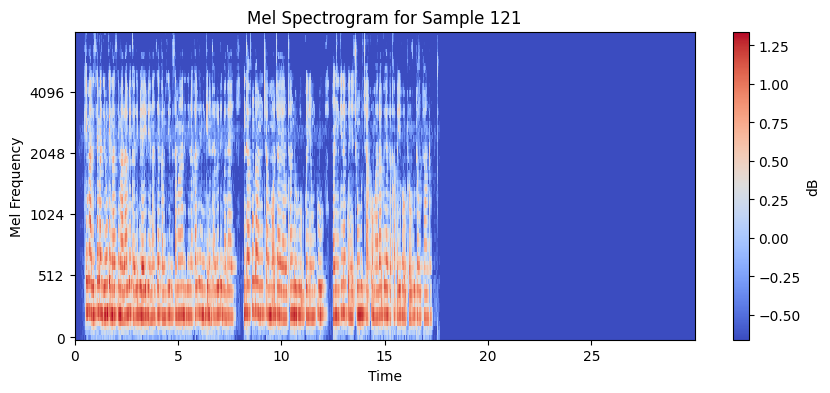

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from datasets import load_from_disk

# Load the dataset (replace with batch or final dataset path)
dataset_path = "/kaggle/working/final_dataset"  # Change as needed
dataset = load_from_disk(dataset_path)

# Select a sample to visualize
sample_idx = 121  # Change index to view different samples
mel_spectrogram = np.array(dataset[sample_idx]["input_features"])

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram, sr=16000, hop_length=160, x_axis="time", y_axis="mel")
plt.colorbar(label="dB")
plt.title(f"Mel Spectrogram for Sample {sample_idx}")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


In [19]:
train_dataset, val_dataset = final_dataset.train_test_split(test_size=0.1).values()

In [20]:
from transformers import WhisperForConditionalGeneration

model = WhisperForConditionalGeneration.from_pretrained('openai/whisper-base')


config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.81k [00:00<?, ?B/s]

In [21]:
from transformers import WhisperProcessor
processor = WhisperProcessor.from_pretrained("openai/whisper-base",language='Swahili',task = "transcribe")



### Uncomment and comment to see the effect of using forced_decoder_ids. Results are different for each case

In [22]:
model.config.forced_decoder_ids = None
#model.config.forced_decoder_ids = processor.get_decoder_prompt_ids(language="swahili", task="transcribe")
model.config.suppress_tokens = []


In [23]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

In [24]:
@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # Prepare input features
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # Prepare labels
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        # Replace padding tokens with -100 (ignored during loss calculation)
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        # Remove unnecessary <BOS> tokens
        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels
        return batch

# Initialize Data Collator
data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [25]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
Note: you may need to restart the kernel to use updated packages.


In [27]:
import evaluate
metric = evaluate.load("wer")

def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    # Replace -100 with the padding token
    label_ids[label_ids == -100] = tokenizer.pad_token_id

    # Convert token IDs to text
    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = tokenizer.batch_decode(label_ids, skip_special_tokens=True)

    # Compute Word Error Rate (WER)
    wer = 100 * metric.compute(predictions=pred_str, references=label_str)
    return {"wer": wer}


In [28]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="/kaggle/working/whisper-model",
    per_device_train_batch_size=16,
    gradient_accumulation_steps=2,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=2000,
    gradient_checkpointing=True,
    fp16=True,
    eval_strategy="steps",
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    generation_max_length=225,
    save_steps=1000,
    eval_steps=200,
    logging_steps=20,
    report_to=["tensorboard"],  # Keep TensorBoard logging
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    dataloader_num_workers=4,  # Faster data loading
    dataloader_pin_memory=True,  # Optimized memory use
)


In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=processor.feature_extractor,
)

processor.save_pretrained(training_args.output_dir)

trainer.train()


<ipython-input-29-284846be5ffc>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
`use_cache = True` is incompatible with gradient checkpointing. Setting `use_cache = False`...


Step,Training Loss,Validation Loss,Wer
200,1.166800,1.114056,64.272756
400,0.727800,0.753793,47.400688
600,0.528500,0.608179,37.178605
800,0.443200,0.549494,34.344698


Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.proce